In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df= pd.read_csv("cereal.csv")
df.head(2)

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679


## Understanding the Dataset

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      77 non-null     object 
 1   mfr       77 non-null     object 
 2   type      77 non-null     object 
 3   calories  77 non-null     int64  
 4   protein   77 non-null     int64  
 5   fat       77 non-null     int64  
 6   sodium    77 non-null     int64  
 7   fiber     77 non-null     float64
 8   carbo     77 non-null     float64
 9   sugars    77 non-null     int64  
 10  potass    77 non-null     int64  
 11  vitamins  77 non-null     int64  
 12  shelf     77 non-null     int64  
 13  weight    77 non-null     float64
 14  cups      77 non-null     float64
 15  rating    77 non-null     float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.8+ KB


The datatypes of all variables is correct.

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
calories,77.0,106.883117,19.484119,50.000000,100.000000,110.000000,110.000000,160.000000
protein,77.0,2.545455,1.094790,1.000000,2.000000,3.000000,3.000000,6.000000
fat,77.0,1.012987,1.006473,0.000000,0.000000,1.000000,2.000000,5.000000
sodium,77.0,159.675325,83.832295,0.000000,130.000000,180.000000,210.000000,320.000000
fiber,77.0,2.151948,2.383364,0.000000,1.000000,2.000000,3.000000,14.000000
carbo,77.0,14.597403,4.278956,-1.000000,12.000000,14.000000,17.000000,23.000000
sugars,77.0,6.922078,4.444885,-1.000000,3.000000,7.000000,11.000000,15.000000
potass,77.0,96.077922,71.286813,-1.000000,40.000000,90.000000,120.000000,330.000000
vitamins,77.0,28.246753,22.342523,0.000000,25.000000,25.000000,25.000000,100.000000
shelf,77.0,2.207792,0.832524,1.000000,1.000000,2.000000,3.000000,3.000000


16 features. Out of that, 13 quantitative variables. And 3 categorical variables. 

Carbohydrates, Sugars and Potassium have minimum values -1. This is not correct. Needs data inspection.

In [ ]:
df.shape

(77, 16)

## Missing values

In [ ]:
df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       0
sugars      0
potass      0
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

No missing values in data.

### Data Inspection of Unusual Missing values: -1 (which might indicate missing value)

In [ ]:
df= df.replace(-1, np.nan)

In [ ]:
df.isnull().sum()

name        0
mfr         0
type        0
calories    0
protein     0
fat         0
sodium      0
fiber       0
carbo       1
sugars      1
potass      2
vitamins    0
shelf       0
weight      0
cups        0
rating      0
dtype: int64

Potential missing values in Carbohydrates, Sugars and Potassium.

Dropping the Cereals with missing values. Because, it is a list of 77 unique cereals. We can't impute them. 

In [ ]:
df= df.dropna()

In [ ]:
df.shape

(74, 16)

Now data is cleaned.

## There will be two methods to analyse the data. 
### 1) Use regression techniques to predict rating of a cereal based on the features.
### 2) Associate each cereal with a Heathiness metric.

### Exploratory Data Analysis

In [ ]:
df.columns

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating'],
      dtype='object')

In [ ]:
df['name'].nunique()

74

All the cereals in the dataset are unique.

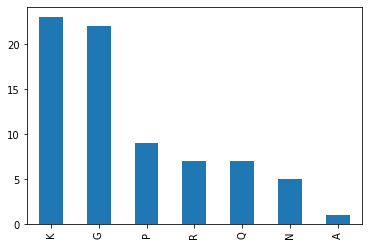

In [ ]:
df['mfr'].value_counts().plot(kind='bar')

Kellogs has the highest number of cereal products available in the market followed by General Mills.

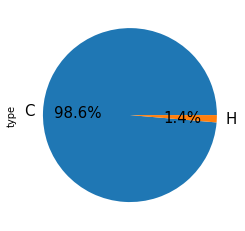

In [ ]:
df['type'].value_counts().plot(kind='pie', autopct= '%1.1f%%', fontsize= 15)

73 cereals are Cold type and 1 cereal is Hot type.

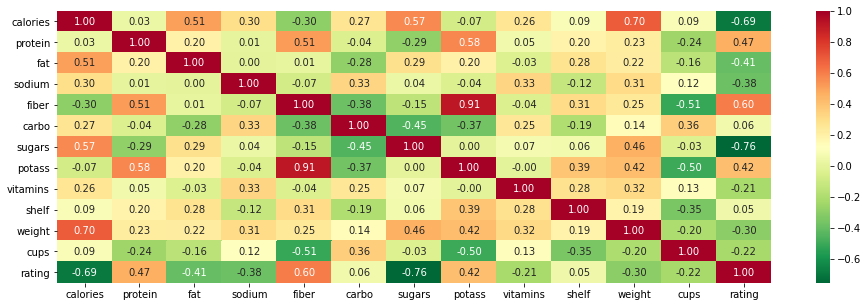

In [ ]:
plt.figure(figsize = (16,5))
sns.heatmap(df.corr(),cmap='RdYlGn_r', annot= True, fmt= ".2f")



1.   Highly Correlated features: fibre and potassium
2.   Correlated features: weight and calories
3.   Negatively Correlated features: sugars and rating



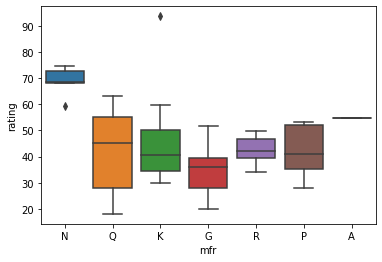

In [ ]:
sns.boxplot(x='mfr', y='rating', data= df)



1.   Cereals from Nabisco company has the highest rating. Additionally, the deviation is also less, all the consumers have given equally high rating to it. 
2.   Cereals from General Mills company and Quaker Oats have the lowest rating among all.



## Analysis 1: Regression on Rating variable

### Dividing the data into X and y

In [ ]:
X= df.iloc[:, 3:14].values
y= df.iloc[:, -1].values

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size= 0.2, random_state=0)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor= RandomForestRegressor(n_estimators= 10, random_state= 0)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [ ]:
y_pred= regressor.predict(X_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred), 1), y_test.reshape(len(y_test), 1)),1))

[[35.95 37.84]
 [49.82 49.51]
 [33.63 32.21]
 [32.55 34.14]
 [26.52 35.25]
 [35.79 41.02]
 [64.5  59.36]
 [49.13 41.5 ]
 [31.17 31.07]
 [67.1  49.12]
 [33.27 37.14]
 [35.39 39.7 ]
 [23.95 26.73]
 [68.22 74.47]
 [31.39 21.87]]


In [ ]:
from sklearn.metrics import r2_score
r2_score(y_true= y_test, y_pred= y_pred)

0.7178550323878681

In [ ]:
y_train_pred= regressor.predict(X_train)
r2_score(y_true= y_train, y_pred= y_train_pred)

0.9708478886985838

## Associate each cereal with a healthiness metric

The categorical variables and the shelf placement number and the rating do not contribute to the heathiness metric of a cereal. Hence, removing them.

In [ ]:
df1= pd.DataFrame()
df1['name']= df['name']

In [ ]:
df1.head(2)

,name
0,100% Bran
1,100% Natural Bran


In [ ]:
df1['calories']= np.abs(df['calories']-200)

In [ ]:
df1['calories'].describe()

count     74.000000
mean      92.972973
std       19.843893
min       40.000000
25%       90.000000
50%       90.000000
75%      100.000000
max      150.000000
Name: calories, dtype: float64

Recommended amount of calories is 200. However, the cereals have high calories. They have to be reduced.

In [ ]:
df1['fat']= df['fat']*100/60

In [ ]:
df1['fat'].describe()

count    74.000000
mean      1.666667
std       1.678043
min       0.000000
25%       0.000000
50%       1.666667
75%       1.666667
max       8.333333
Name: fat, dtype: float64

In [ ]:
df1['fiber']= df['fiber']*100/30

In [ ]:
df1['sugars']= df['sugars']*100/50

In [ ]:
carbs = df[["fiber", "sugars", "carbo"]]

total_carb = pd.Series(
    carbs.sum(axis = 1),
    name = "total_carb",
)

print(carbs.join(total_carb))

    fiber  sugars  carbo  total_carb
0    10.0     6.0    5.0        21.0
1     2.0     8.0    8.0        18.0
2     9.0     5.0    7.0        21.0
3    14.0     0.0    8.0        22.0
5     1.5    10.0   10.5        22.0
..    ...     ...    ...         ...
72    0.0     3.0   21.0        24.0
73    0.0    12.0   13.0        25.0
74    3.0     3.0   17.0        23.0
75    3.0     3.0   17.0        23.0
76    1.0     8.0   16.0        25.0

[74 rows x 4 columns]


In [ ]:
df1['total_carbo']= total_carb*100/275

In [ ]:
df1["vit_score"] = df["vitamins"].replace(
    [25, 0, 100],
    [3, 2, 1],
)

In [ ]:
max_df = (df[["fiber", "protein", "potass"]] # Original data
             .join(df1[["total_carbo", "vit_score"]]).add(0.01) # Transformed data
                      
         )

min_df = (df[["fat", "sugars", "sodium"]] # Original data
             .join(df1["calories"]).add(0.01) # Transformed data
         )

In [ ]:
max_df_prod = max_df.product(axis = 1)
min_df_prod = min_df.product(axis = 1)

# Divide `max_prod` by `min_prod` to get the scores.
score = max_df_prod.divide(min_df_prod)

# Append the final scores as a column to a new `leaderboard_df`.
leaderboard_df = pd.DataFrame()
leaderboard_df["name"] = df1["name"]
leaderboard_df["score"] = score

print(leaderboard_df)

                         name          score
0                   100% Bran       2.521297
1           100% Natural Bran       0.223322
2                    All-Bran       1.555709
3   All-Bran with Extra Fiber  212828.288724
5     Apple Cinnamon Cheerios       0.015715
..                        ...            ...
72                    Triples       0.000464
73                       Trix       0.000045
74                 Wheat Chex       0.375553
75                   Wheaties       0.413107
76        Wheaties Honey Gold       0.022914

[74 rows x 2 columns]


In [ ]:
leaderboard_df["score_rank"] = leaderboard_df["score"].rank(
    method = "dense",
    ascending = False,
)

leaderboard_df = leaderboard_df.sort_values("score_rank")
print(leaderboard_df)

                         name         score  score_rank
64     Shredded Wheat 'n'Bran  2.585520e+08         1.0
65  Shredded Wheat spoon size  1.663521e+08         2.0
63             Shredded Wheat  6.661308e+07         3.0
55               Puffed Wheat  5.454997e+06         4.0
26        Frosted Mini-Wheats  3.399048e+05         5.0
..                        ...           ...         ...
31             Golden Grahams  5.212695e-05        70.0
29             Fruity Pebbles  4.694240e-05        71.0
73                       Trix  4.526600e-05        72.0
12      Cinnamon Toast Crunch  2.405215e-05        73.0
10               Cap'n'Crunch  2.188417e-05        74.0

[74 rows x 3 columns]


According to the score applied: Shredded Wheat Bran is heathiest
And, Cap and Cruch is least healthy.